In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

file = 'data/butane_propane_N=8100_D=16.xlsx'
xls = pd.ExcelFile(file)
df = pd.read_excel(xls, 'Inputs')

df = df.sample(frac=1) # Shuffle the dataset

# df.info(verbose=True)
# df.isnull().values.any()
# print(df.columns[df.isnull().any()])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           300 non-null    int64  
 1   Tank failure Pressure (bar)  300 non-null    float64
 2   Liquid ratio (%)             300 non-null    float64
 3   Tank width (m)               300 non-null    float64
 4   Tank length (m)              300 non-null    float64
 5   Tank height (m)              300 non-null    float64
 6   Height of BLEVE (m)          300 non-null    float64
 7   Tank height with gas (m)     300 non-null    float64
 8    Vapour temerature (K)       300 non-null    float64
 9    liquid temerature (K)       300 non-null    float64
 10  Obstacle distance to BLEVE   300 non-null    int64  
 11  Width of Obstacle            300 non-null    int64  
 12  Height of Obstacle           300 non-null    int64  
 13  Thickness of Obstacl

In [4]:
df.loc[df['Status'] == 'Subcooled', 'Status'] = 0
df.loc[df['Status'] == 'Superheated', 'Status'] = 1

In [5]:
# Col 0 is ID, Col 1-15 are features
df_x = df.iloc[:, 1:16]
df_x['Status'] = df_x['Status'].astype('float32')

# Cols 16-42 are 27 sensors with varying position on obstacle
df_y = df.iloc[:, 16:]
cols = [a for a in list(df_y.columns.values)]

XY = []
for i in range(df_y.shape[0]):
    for j in range(len(cols)):
        x = df_x.iloc[i, :].tolist()
        x.append(int(cols[j]))  # add label of col as feature "Distance from BLEVE"
        x.append(df_y.iloc[i, j])  # add target values
        XY.append(x)

columns = list(df_x.columns.values)
columns.append('Position ID')
columns.append('target')

data = pd.DataFrame(XY, columns=columns)

In [6]:
data.shape

(8100, 17)

In [7]:
missing_values = data.isnull().values.any()
print(data.columns[data.isnull().any()])
if missing_values:
    print("===There is Missing value===")

Index([], dtype='object')


In [8]:
target = data["target"]
data.drop("target", axis=1, inplace=True)

# dataset split, 70% training 15 validation 15 testing
n_train = int(data.shape[0] * 0.7)
n_val = int(data.shape[0] * 0.85)

train_X = data[:n_train].to_numpy()
train_y = target[:n_train].to_numpy()
val_X = data[n_train:n_val].to_numpy()
val_y = target[n_train:n_val].to_numpy()
test_X = data[n_val:].to_numpy()
test_y = target[n_val:].to_numpy()

train_X = train_X.astype(np.float32)
train_y = train_y.astype(np.float32)
val_X = val_X.astype(np.float32)
val_y = val_y.astype(np.float32)
test_X = test_X.astype(np.float32)
test_y = test_y.astype(np.float32)

# Data preprocessing
scaler = StandardScaler().fit(train_X)
mean_X = scaler.mean_
std_X = scaler.scale_

# Normalization moved to main.py
# train_X = scaler.transform(train_X)
# val_X = scaler.transform(val_X)
# test_X = scaler.transform(test_X)
# real_test_X = scaler.transform(real_test_X)

print(train_X.shape, val_X.shape, test_X.shape)

(5670, 16) (1215, 16) (1215, 16)


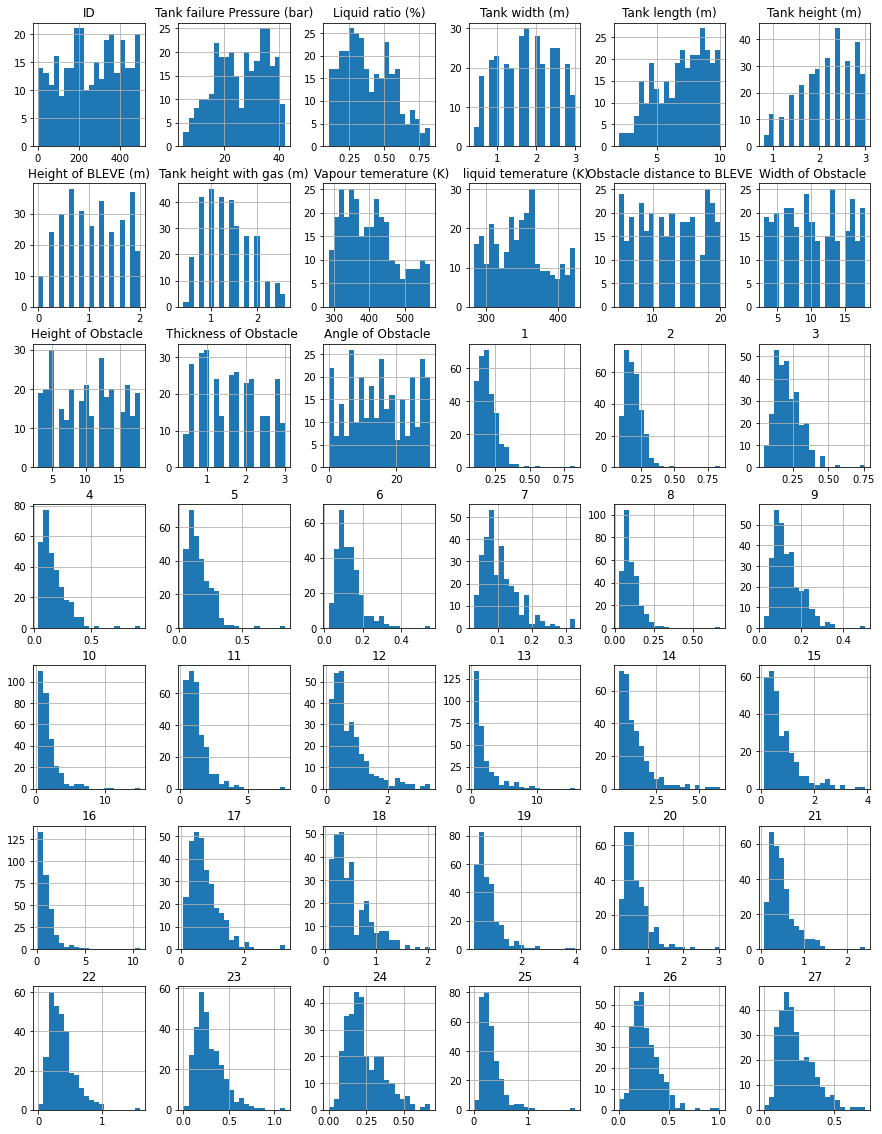

In [3]:
hist = df.hist(figsize = (15,20), bins=20)